In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/data.csv')
pd.set_option('display.max_rows', 200)
len(df.index)

5943

In [3]:
#removing fights before 2009
# df.drop(df.index[df['location'] < 2009], inplace = True)
# len(df.index)

In [4]:
#removing 5 round fights
# df.drop(df.index[df['title_bout'] == True], inplace = True)
# len(df.index)

In [5]:
#removing instances of draws
df.drop(df.index[df['Winner'] == 'Draw'], inplace = True)
len(df.index)

5836

In [6]:
#I wonder what percent null values each column has
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
R_fighter,R_fighter,0.000000
R_current_win_streak,R_current_win_streak,0.000000
R_total_title_bouts,R_total_title_bouts,0.000000
R_total_rounds_fought,R_total_rounds_fought,0.000000
B_win_by_TKO_Doctor_Stoppage,B_win_by_TKO_Doctor_Stoppage,0.000000
B_win_by_Submission,B_win_by_Submission,0.000000
B_win_by_KO/TKO,B_win_by_KO/TKO,0.000000
B_win_by_Decision_Unanimous,B_win_by_Decision_Unanimous,0.000000
B_win_by_Decision_Split,B_win_by_Decision_Split,0.000000
B_win_by_Decision_Majority,B_win_by_Decision_Majority,0.000000


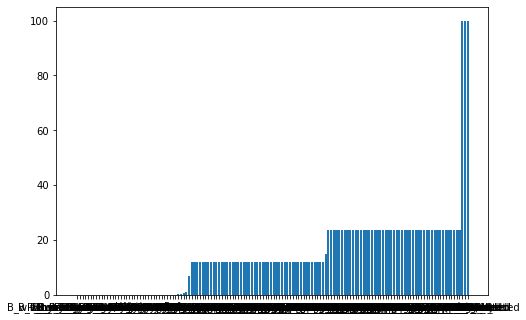

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(missing_value_df['column_name'], missing_value_df['percent_missing'])
plt.show()

In [17]:
missing_value_df.columns

Index(['column_name', 'percent_missing'], dtype='object')

In [18]:
for col in missing_value_df.index:
    print(col)
    print(missing_value_df['column_name'][col])
    if missing_value_df['percent_missing'][col] > 20:
        df = df.drop(columns = col)

R_fighter
R_fighter
R_current_win_streak
R_current_win_streak
R_total_title_bouts
R_total_title_bouts
R_total_rounds_fought
R_total_rounds_fought
B_win_by_TKO_Doctor_Stoppage
B_win_by_TKO_Doctor_Stoppage
B_win_by_Submission
B_win_by_Submission
B_win_by_KO/TKO
B_win_by_KO/TKO
B_win_by_Decision_Unanimous
B_win_by_Decision_Unanimous
B_win_by_Decision_Split
B_win_by_Decision_Split
B_win_by_Decision_Majority
B_win_by_Decision_Majority
B_draw
B_draw
B_losses
B_losses
B_wins
B_wins
B_longest_win_streak
B_longest_win_streak
B_current_lose_streak
B_current_lose_streak
B_current_win_streak
B_current_win_streak
R_current_lose_streak
R_current_lose_streak
B_total_title_bouts
B_total_title_bouts
R_longest_win_streak
R_longest_win_streak
R_losses
R_losses
B_fighter
B_fighter
location
location
Winner
Winner
title_bout
title_bout
weight_class
weight_class
R_wins
R_wins
R_win_by_TKO_Doctor_Stoppage
R_win_by_TKO_Doctor_Stoppage
B_total_rounds_fought
B_total_rounds_fought
R_win_by_KO/TKO
R_win_by_KO/TKO


In [20]:
#filling nan values
df['R_Stance'].fillna('Orthodox', inplace=True)
df['B_Stance'].fillna('Orthodox', inplace=True)
df['R_Reach_cms'].fillna(df['R_Height_cms'], inplace=True)
df['B_Reach_cms'].fillna(df['B_Height_cms'], inplace=True)
df.fillna(df.median(), inplace=True)

In [22]:
#dropping unuseful features
df.drop(columns=['Referee','location', 'R_fighter', 'B_fighter', 'title_bout'], inplace=True)

In [23]:
#one hot encoding categorical variables
df = pd.concat([df, pd.get_dummies(df[['weight_class', 'B_Stance', 'R_Stance']])], axis=1)
df.drop(columns=['weight_class', 'B_Stance', 'R_Stance'], inplace=True)

In [24]:
#converting classifications to numerical value. Blue is 1, red is 0
df['Winner'] = df['Winner'].map({'Blue': 1, 'Red': 0})

In [26]:
df.to_csv('../data/JMpreprocessed_data.csv', index=False)